# Wang et al. (2006) Flux Footprint Demo

This Jupyter notebook demonstrates how to

1. Compute the **cross‑wind‑integrated** flux footprint \(f(x)\)  
   using the *semi‑empirical* parameterisation of **Wang et al. (2006)**.
2. Reconstruct a **2‑D Gaussian footprint** \(f(x,y)\) assuming lateral
   dispersion grows linearly with distance.
3. Visualise both the 1‑D and 2‑D results.

> **Literature**  
> Wang W., Davis K.J., Ricciuto D.M., Butler M.P. (2006).  
> *An Approximate Footprint Model for Flux Measurements in the Convective Boundary Layer*.  
> **J. Atmos. Oceanic Tech. 23(10)**, 1384–1394.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
#sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), "../src")))
sys.path.append("../../src")

# Import the local module (ensure it's on PYTHONPATH or in the same folder)
from fluxfootprints.wang_footprint import wang2006_fy, reconstruct_gaussian_2d

# Inline plotting
%matplotlib inline
plt.rcParams['figure.dpi'] = 120


c:\Users\paulinkenbrandt\Documents\GitHub\footprints\docs\notebooks\../../src\fluxfootprints\improved_ffp.py:1610: SyntaxWarning: invalid escape sequence '\s'
  """


In [3]:
# --- Example micrometeorological inputs -------------------------------
z_m   = 20.0    # measurement height (m)
z0    = 0.1     # roughness length (m)
L     = -50.0   # Obukhov length (m)  (negative = convective)
h     = 1000.0  # mixing height (m)

# x grid (m)
x = np.linspace(1.0, 2000.0, 800)

# Compute cross‑wind‑integrated footprint using Wang et al. 2006
f_x = wang2006_fy(x, z_m, h, L)

# Normalise to ensure integral ≈ 1
dx = x[1] - x[0]
f_x /= np.trapezoid(f_x, x)
print('∫ f(x) dx =', np.trapezoid(f_x, x))


∫ f(x) dx = 1.0


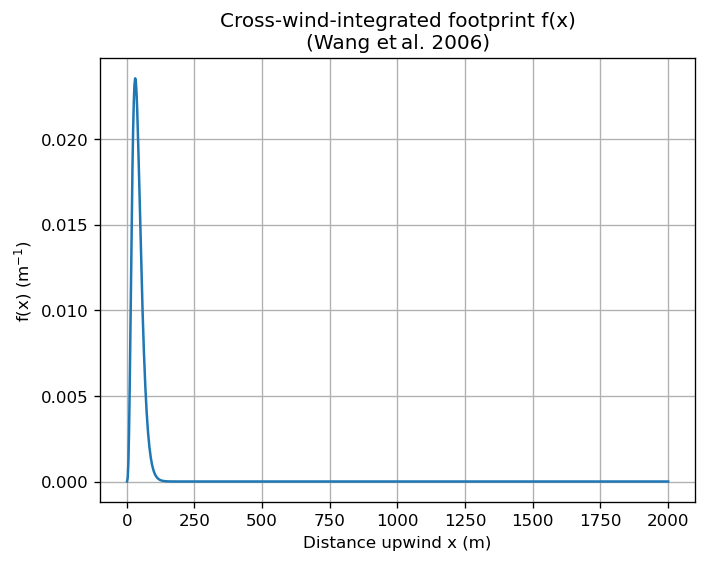

In [4]:
fig, ax = plt.subplots()
ax.plot(x, f_x, color='tab:blue')
ax.set_xlabel('Distance upwind x (m)')
ax.set_ylabel('f(x) (m$^{-1}$)')
ax.set_title('Cross‑wind‑integrated footprint f(x)\n(Wang et al. 2006)')
ax.grid(True)
